In [1]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4374475508296656260
 xla_global_id: -1]

In [3]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

/bin/bash: line 1: google-drive-ocamlfuse: command not found
drive  sample_data


In [4]:

!ls drive

MyDrive


In [5]:
import os
os.chdir("/content/drive/My Drive/ayhanproje/")
!pwd

/content/drive/My Drive/ayhanproje


In [6]:

!ls

contants.py  Docker.file  __pycache__	      requirements.txt
db.json      proje.py	  Rakam_Tanima.ipynb  vector_db.py


In [7]:
pip install -q keras

In [8]:
## uygulama başlangıc

In [9]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt



In [10]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

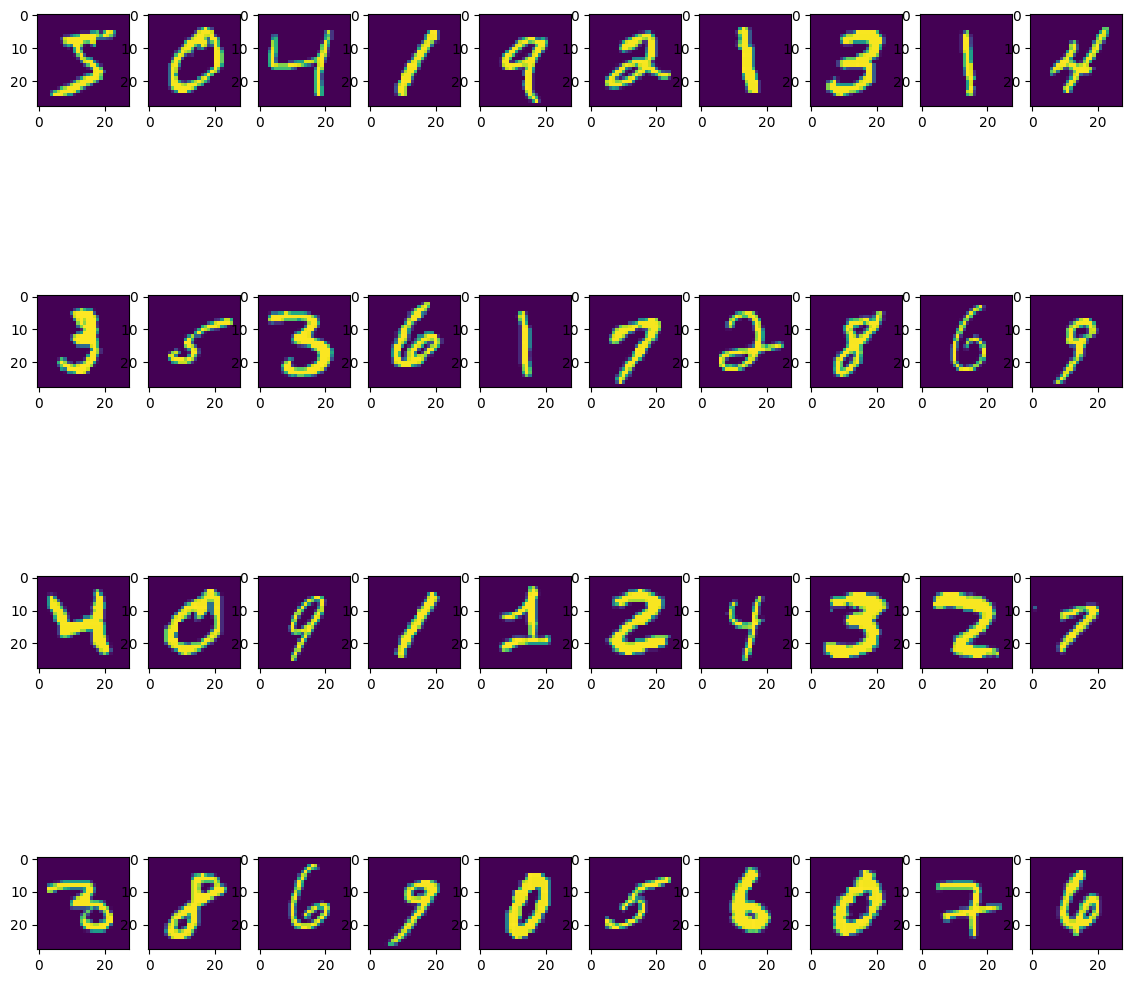

In [11]:
plt.figure(figsize=(14,14))
x,y=10,4
for i in range(40):
  plt.subplot(y,x,i+1)
  plt.imshow(x_train[i])
plt.show()

In [12]:
batch_size = 128
num_classes = 10
epochs = 6 # 12 epoch önerilir

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



In [13]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)


In [14]:
#model olusturma
model=Sequential()


In [15]:
#KATLANLARIN OLUSMASI
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=["accuracy"])

In [18]:
#eğitim işlemleri

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/6
469/469 [==============================] - 189s 398ms/step - loss: 24.2459 - accuracy: 0.1350 - val_loss: 4.1299 - val_accuracy: 0.3706
Epoch 2/6
469/469 [==============================] - 163s 348ms/step - loss: 10.2836 - accuracy: 0.2414 - val_loss: 1.7023 - val_accuracy: 0.5725
Epoch 3/6
469/469 [==============================] - 167s 357ms/step - loss: 5.3074 - accuracy: 0.3119 - val_loss: 1.2763 - val_accuracy: 0.5893
Epoch 4/6
469/469 [==============================] - 190s 405ms/step - loss: 3.2259 - accuracy: 0.3392 - val_loss: 1.4030 - val_accuracy: 0.5508
Epoch 5/6
469/469 [==============================] - 168s 358ms/step - loss: 2.4401 - accuracy: 0.3453 - val_loss: 1.5298 - val_accuracy: 0.5227
Epoch 6/6
469/469 [==============================] - 160s 341ms/step - loss: 2.1169 - accuracy: 0.3595 - val_loss: 1.5418 - val_accuracy: 0.5515


In [19]:
model.save("save_models/mnist_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
score=model.evaluate(x_test,y_test,verbose=0)

In [21]:
#Rastgele değer için test işlemi

In [22]:
model_test = model.save('save_models/mnist_model.h5')

In [23]:
test_image = x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

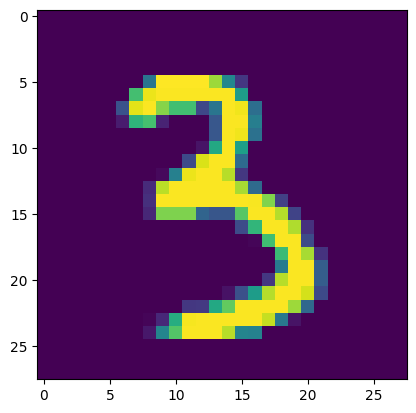

In [24]:
plt.imshow(test_image.reshape(28,28))

In [25]:
test_data = x_test[32].reshape(1,28,28,1)
pre=model_test.predict(test_data, batch_size=1)

AttributeError: ignored